In [1]:
import torch
from torch import nn
import numpy as np

# 1 basics

$$
PE(t, 2i) = \sin(\frac{t}{10000^{2i/d}})
$$

$$
PE(t, 2i+1) = \cos(\frac{t}{10000^{2i/d}})
$$

In [2]:
max_sequence_length = 10
d_model = 6

In [3]:
even_i = torch.arange(0, d_model, 2).float()
print(even_i)
odd_i = torch.arange(1, d_model, 2).float()
print(odd_i)

tensor([0., 2., 4.])
tensor([1., 3., 5.])


In [4]:
position = torch.arange(max_sequence_length, dtype=torch.float32).reshape(-1,1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [5]:
# 偶数列
even_pe = torch.sin(position / torch.pow(10000, even_i / d_model))
even_pe

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [6]:
# 奇数列
odd_pe = torch.cos(position / torch.pow(10000, (odd_i-1) / d_model))
odd_pe

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [7]:
stacked = torch.stack([even_pe, odd_pe], dim = 2)
stacked # 10 x 3 x 2 这里多了一个维度，多出来的维度是逐个元素拼接出来的所以是 10,3,2

tensor([[[ 0.0000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.0000,  1.0000]],

        [[ 0.8415,  0.5403],
         [ 0.0464,  0.9989],
         [ 0.0022,  1.0000]],

        [[ 0.9093, -0.4161],
         [ 0.0927,  0.9957],
         [ 0.0043,  1.0000]],

        [[ 0.1411, -0.9900],
         [ 0.1388,  0.9903],
         [ 0.0065,  1.0000]],

        [[-0.7568, -0.6536],
         [ 0.1846,  0.9828],
         [ 0.0086,  1.0000]],

        [[-0.9589,  0.2837],
         [ 0.2300,  0.9732],
         [ 0.0108,  0.9999]],

        [[-0.2794,  0.9602],
         [ 0.2749,  0.9615],
         [ 0.0129,  0.9999]],

        [[ 0.6570,  0.7539],
         [ 0.3192,  0.9477],
         [ 0.0151,  0.9999]],

        [[ 0.9894, -0.1455],
         [ 0.3629,  0.9318],
         [ 0.0172,  0.9999]],

        [[ 0.4121, -0.9111],
         [ 0.4057,  0.9140],
         [ 0.0194,  0.9998]]])

In [8]:
pe = torch.flatten(stacked, start_dim=1, end_dim=2)
pe # 10 x 6

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [9]:
torch.flatten?

Docstring:
flatten(input, start_dim=0, end_dim=-1) -> Tensor

Flattens :attr:`input` by reshaping it into a one-dimensional tensor. If :attr:`start_dim` or :attr:`end_dim`
are passed, only dimensions starting with :attr:`start_dim` and ending with :attr:`end_dim` are flattened.
The order of elements in :attr:`input` is unchanged.

Unlike NumPy's flatten, which always copies input's data, this function may return the original object, a view,
or copy. If no dimensions are flattened, then the original object :attr:`input` is returned. Otherwise, if input can
be viewed as the flattened shape, then that view is returned. Finally, only if the input cannot be viewed as the
flattened shape is input's data copied. See :meth:`torch.Tensor.view` for details on when a view will be returned.

.. note::
    Flattening a zero-dimensional tensor will return a one-dimensional view.

Args:
    input (Tensor): the input tensor.
    start_dim (int): the first dim to flatten
    end_dim (int): the last dim

In [10]:
class SinPositionEncodding(nn.Module):
    def __init__(self, max_sequence_length, d_model, base=10000):
        super().__init__()
        
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model
        self.base = base
        
    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        # odd_i = torch.arange(0, self.d_model, 2).float()
        position = torch.arange(self.max_sequence_length, dtype=torch.float32).reshape(-1, 1)
        even_pe = torch.sin(position / torch.pow(self.base, even_i / self.d_model))
        odd_pe = torch.cos(position / torch.pow(self.base, even_i / self.d_model))
        stacked = torch.stack([even_pe, odd_pe], dim=2)
        return torch.flatten(stacked, start_dim=1)

In [11]:
spe = SinPositionEncodding(10, 6)
spe()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

## 相对位置关系

In [12]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
from tqdm.auto import tqdm

In [13]:
def get_sinusoidal_embedding(n_position, d_hid, padding_idx=None):
    ''' Generate sinusoidal embeddings for a given number of positions and hidden size
    '''
    # Compute the positional encodings once in log space
    pe = torch.zeros(n_position, d_hid)
    position = torch.arange(0, n_position).unsqueeze(1).float()
    div_term = torch.exp(torch.arange(0, d_hid, 2).float() * -(math.log(10000.0) / d_hid))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    if padding_idx is not None:
        # Zero out the embedding vector for padding symbol
        pe[padding_idx] = 0.
    return pe.numpy()

In [14]:
n_position = 1024
d_hid = 128
padding_idx = 0
pe = get_sinusoidal_embedding(n_position, d_hid, padding_idx)
print(pe.shape)  # Output: torch.Size([100, 128])

(1024, 128)


In [15]:
# torch.dot(pe[2], pe[12]).item()
Length = n_position
Hidden = d_hid
n = list(range(Length))
m = list(range(Length))

y_vals = [0] * (Length*2)
for i in tqdm(n):
    for j in m:
        # x_vals.append(i-j)
        y_vals[i-j+Length] = np.dot(pe[i], pe[j])

  0%|          | 0/1024 [00:00<?, ?it/s]

In [16]:
x_vals = np.array(list(range(Length*2))) - Length
compressed_y_vals = np.array(y_vals) - Hidden/2
compressed_y_vals = compressed_y_vals / (2**4)

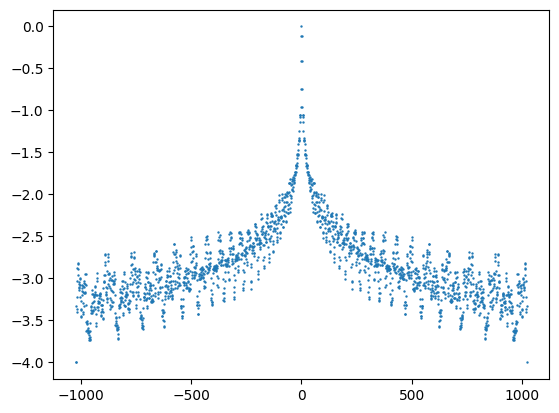

In [17]:
plt.scatter(x_vals, compressed_y_vals, s=0.5)
plt.show()